In [1]:
import sklearn
import pandas as pd

# print("scikit-learn version:", sklearn.__version__)
# print("pandas version:", pd.__version__)

In [2]:
import pickle

with open('yk_dataframes.pkl', 'rb') as file:
    data = pickle.load(file)

yk_full = data['yk_full']
yk_dropped = data['yk_dropped']


with open('ty_dataframes.pkl', 'rb') as file:
    data = pickle.load(file)

ty_full = data['ty_full']
ty_dropped = data['ty_dropped']

In [3]:
import pandas as pd 

df_full = pd.concat([yk_full, ty_full], axis=0)
df_full

,Name,Target,Target_Encoded,Distribution Type,Mean,Median,Std_Dev,IQR,Skewness,Kurtosis,...,Tail_Length_Ratio_05,Excess_Kurtosis,P99,P1,Outliers_Zscore,Outliers_IQR,KS_Stat_norm,KS_P_value_norm,Shapiro_Stat,Shapiro_P_value
0,temperature,Other,0,functional,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-3.000000,0.000000,0.000000,0,0,1.000000,0.0,0.000000,0.000000e+00
1,Device_Test_Time,Outlier/Longtail,1,longtail,1.830048e-16,0.252373,1.000007,0.443438,-6.338681,49.533672,...,26.161736,46.533672,0.687064,-5.402994,1197,69577,0.310838,0.0,0.398593,7.040191e-157
2,Part_Id,Outlier/Longtail,1,longtail,1.045742e-16,-0.129072,1.000007,1.597451,0.435881,-0.729177,...,0.032404,-3.729177,2.352655,-1.418352,0,0,0.076701,0.0,0.955334,3.218504e-84
3,g2bist_efuse_blank_read_f_:Functional[1],Other,0,functional,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-3.000000,0.000000,0.000000,0,0,1.000000,0.0,0.000000,0.000000e+00
4,tdf_50k_2_f_:Functional[1],Other,0,functional,-5.551115e-17,-0.577350,1.154701,0.577350,0.000000,0.000000,...,0.000000,-3.000000,1.662769,-0.577350,0,4,1.000000,0.0,0.000000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397,f_nvm_programXxXPgmPatrepairinfo2M1YvhsYvhsYyY...,Other,0,functional,1.660147e-16,-0.162416,1.000390,0.000000,0.000000,0.000000,...,0.000000,-3.000000,6.157036,-0.162416,33,1284,1.000000,0.0,0.000000,0.000000e+00
1398,f_nvm_readifrXxXVfyPatrepairinfo2M1YvhsYvhsYyY...,Other,0,functional,1.660147e-16,-0.162416,1.000390,0.000000,0.000000,0.000000,...,0.000000,-3.000000,6.157036,-0.162416,33,1284,1.000000,0.0,0.000000,0.000000e+00
1399,f_nvm_XxXRdoutPatrepairinfo3M1YvhsYvhsYyYYy_1....,Other,0,functional,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-3.000000,0.000000,0.000000,0,0,1.000000,0.0,0.000000,0.000000e+00
1400,f_nvm_readifrXxXVfyPatrepairinfo3M1YvhsYvhsYyY...,Other,0,functional,-2.293553e-18,0.839089,1.000161,2.030858,0.000000,0.000000,...,0.000000,-3.000000,0.839089,-1.191769,0,0,1.000000,0.0,0.000000,0.000000e+00


In [4]:
df_full[df_full.isnull().any(axis=1)].shape[0]
#df_full.isnull().sum()

3

In [5]:
df_full_filled = df_full.fillna(0)

In [6]:
from sklearn.model_selection import train_test_split

columns_to_drop = ['Target', 'Name', 'Distribution Type', 'Target_Encoded']
X = df_full_filled.drop(columns = columns_to_drop)
y = df_full_filled['Target_Encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [8]:
# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9629629629629629
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       335
           1       0.93      0.95      0.94       151

    accuracy                           0.96       486
   macro avg       0.95      0.96      0.96       486
weighted avg       0.96      0.96      0.96       486



# Feature Crossing

In [9]:
X_train_crossed = X_train.copy()
X_test_crossed = X_test.copy()
crossed = [X_train_crossed, X_test_crossed]

to_drop = list(importance_df_crossed.sort_values(by='Importance', ascending=True)[:5]['Feature'])

for df in crossed:
    df['skewness_kurtosis'] = df['Skewness'] * df['Kurtosis']
    # test['mean_median_ratio'] = test['Mean'] / test['Median'] #uesless
    # test['mean_std_dev'] = test['Mean'] * test['Std_Dev'] #useless
    df['skewness_range'] = df['Skewness'] * df['Range']
    df['kurtosis_range'] = df['Kurtosis'] * df['Range']
    df['iqr_skewness'] = df['IQR'] * df['Skewness']
    df['mean_kurtosis'] = df['Mean'] * df['Kurtosis'] #expose the central tendency's r/s to the tailedness, differentiating heavy-tailed distributions from more typical ones
    df = df.drop(to_drop, axis=1)

NameError: name 'importance_df_crossed' is not defined

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_crossed = RandomForestClassifier(class_weight={0: 1, 1: 10})

model_crossed.fit(X_train_crossed, y_train)

y_pred_crossed = model_crossed.predict(X_test_crossed)

In [ ]:
# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred_crossed))
print("Classification Report:\n", classification_report(y_test, y_pred_crossed))

Accuracy: 0.9609053497942387
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       335
           1       0.94      0.93      0.94       151

    accuracy                           0.96       486
   macro avg       0.96      0.95      0.95       486
weighted avg       0.96      0.96      0.96       486



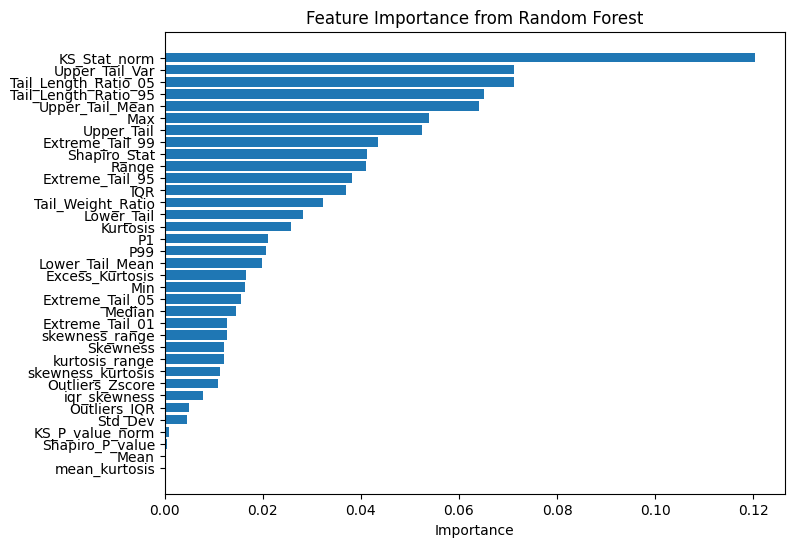

In [ ]:
import pandas as pd
import matplotlib as plt

importances_crossed = model_crossed.feature_importances_

importance_df_crossed = pd.DataFrame({
    'Feature': X_train_crossed.columns,
    'Importance': importances_crossed
}).sort_values(by='Importance', ascending=True)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.barh(importance_df_crossed['Feature'], importance_df_crossed['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.show()

In [ ]:
to_drop = list(importance_df_crossed.sort_values(by='Importance', ascending=True)[:5]['Feature'])

# Checking if dataset is balanced

In [ ]:
y.value_counts()

Target_Encoded
0    1729
1     698
Name: count, dtype: int64

# Conduct oversampling to balance dataset

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
y_train_smote.value_counts()

Target_Encoded
0    1394
1    1394
Name: count, dtype: int64

In [ ]:
model_smote = RandomForestClassifier() # class_weight={0: 1, 1: 10}
model_smote.fit(X_train_smote, y_train_smote)

y_pred_smote = model_smote.predict(X_test)
#y_pred_smote_adjusted = (model_smote.predict_proba(X_test)[:, 1] >= f1_threshold).astype(int) # f1_threshold calculated below

In [ ]:
# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("Classification Report:\n", classification_report(y_test, y_pred_smote))

Accuracy: 0.9588477366255144
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       335
           1       0.92      0.95      0.94       151

    accuracy                           0.96       486
   macro avg       0.95      0.96      0.95       486
weighted avg       0.96      0.96      0.96       486



In [ ]:
import pickle

with open('combined_smote_model.pkl', 'wb') as file:
    pickle.dump(model_smote, file)

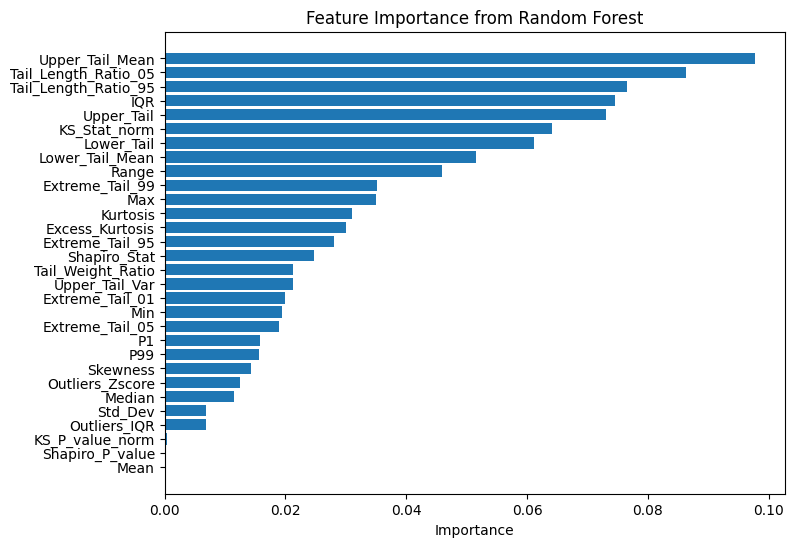

In [ ]:
import pandas as pd
import matplotlib as plt

importances = model_smote.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X_train_smote.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=True)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.show()

# Adjusting decision threshold to improve recall

In [ ]:
from sklearn.metrics import precision_recall_curve
import numpy as np

y_probs = model_smote.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# best threshold for recall
recall_idx = np.argmax(recalls)
recall_threshold = thresholds[recall_idx]

# best threshld for f1 score
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
f1_idx = np.argmax(f1_scores)
f1_threshold = thresholds[f1_idx]

y_pred_f1= (y_probs >= f1_threshold).astype(int)
print("Optimizing f1-score for positive class")
print("Accuracy:", accuracy_score(y_test, y_pred_f1))
print("Classification Report:\n", classification_report(y_test, y_pred_f1))

# y_pred_recall= (y_probs >= recall_threshold).astype(int)
# print("Optimizing recall for positive class")
# print("Accuracy:", accuracy_score(y_test, y_pred_recall))
# print("Classification Report:\n", classification_report(y_test, y_pred_recall))

Optimizing f1-score for positive class
Accuracy: 0.9670781893004116
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       335
           1       0.95      0.94      0.95       151

    accuracy                           0.97       486
   macro avg       0.96      0.96      0.96       486
weighted avg       0.97      0.97      0.97       486



In [ ]:
X_train.columns

Index(['Mean', 'Median', 'Std_Dev', 'IQR', 'Skewness', 'Kurtosis', 'Min',
       'Max', 'Range', 'Upper_Tail', 'Lower_Tail', 'Extreme_Tail_95',
       'Extreme_Tail_99', 'Extreme_Tail_05', 'Extreme_Tail_01',
       'Upper_Tail_Mean', 'Upper_Tail_Var', 'Lower_Tail_Mean',
       'Tail_Weight_Ratio', 'Tail_Length_Ratio_95', 'Tail_Length_Ratio_05',
       'Excess_Kurtosis', 'P99', 'P1', 'Outliers_Zscore', 'Outliers_IQR',
       'KS_Stat_norm', 'KS_P_value_norm', 'Shapiro_Stat', 'Shapiro_P_value'],
      dtype='object')

# Gradient Boosting
Performs better without using resampled data

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

xgb_model = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, xgb_pred))
print("Classification Report:\n", classification_report(y_test, xgb_pred))

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy: 0.9588477366255144
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       335
           1       0.93      0.93      0.93       151

    accuracy                           0.96       486
   macro avg       0.95      0.95      0.95       486
weighted avg       0.96      0.96      0.96       486



# Hyperparameter tuning
Does not improve (don't use)

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [1, 10, 50]
}

xgb_clf = xgb.XGBClassifier()

grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=3, scoring='roc_auc', n_jobs=-1, verbose=0)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'scale_pos_weight': 10, 'subsample': 0.8}


In [ ]:
xgb_model = XGBClassifier(**grid_search.best_params_)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, xgb_pred))
print("Classification Report:\n", classification_report(y_test, xgb_pred))

Accuracy: 0.9609053497942387
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       335
           1       0.93      0.95      0.94       151

    accuracy                           0.96       486
   macro avg       0.95      0.96      0.95       486
weighted avg       0.96      0.96      0.96       486



# Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(probability=True, random_state=42, class_weight='balanced')
svm_model.fit(X_train_smote, y_train_smote)
svm_pred = svm_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, svm_pred))
print("Classification Report:\n", classification_report(y_test, svm_pred))

Accuracy: 0.6358024691358025
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.50      0.65       335
           1       0.46      0.94      0.62       151

    accuracy                           0.64       486
   macro avg       0.70      0.72      0.63       486
weighted avg       0.80      0.64      0.64       486



# Stacked Model

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from catboost import CatBoostClassifier

rf_model = RandomForestClassifier()
xgb_model = XGBClassifier()
catboost_model = CatBoostClassifier(learning_rate=0.1, depth=6, iterations=100, verbose=0)
svm_model = SVC(probability=True)

meta_model = LogisticRegression()
#meta_model = DecisionTreeClassifier()
#meta_model = GradientBoostingClassifier()
#meta_model = MLPClassifier()


kf = KFold(n_splits=5, shuffle=True, random_state=42)

train_meta_features = np.zeros((X_train_smote.shape[0], 3)) 
test_meta_features = np.zeros((X_test.shape[0], 3))

for i, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    X_tr, X_val = X_train_smote.iloc[train_idx], X_train_smote.iloc[val_idx]
    y_tr, y_val = y_train_smote.iloc[train_idx], y_train_smote.iloc[val_idx]

    # Random Forest
    rf_model.fit(X_tr, y_tr)
    train_meta_features[val_idx, 0] = rf_model.predict(X_val)
    test_meta_features[:, 0] += rf_model.predict(X_test) / kf.n_splits

    # XGBoost
    xgb_model.fit(X_tr, y_tr)
    train_meta_features[val_idx, 1] = xgb_model.predict(X_val)
    test_meta_features[:, 1] += xgb_model.predict(X_test) / kf.n_splits

    # CatBoost
    catboost_model.fit(X_tr, y_tr)
    train_meta_features[val_idx, 2] = catboost_model.predict(X_val)
    test_meta_features[:, 2] += catboost_model.predict(X_test) / kf.n_splits

    # SVM
    svm_model.fit(X_tr, y_tr)
    train_meta_features[val_idx, 2] = svm_model.predict(X_val)
    test_meta_features[:, 2] += svm_model.predict(X_test) / kf.n_splits

# train meta-model on the predictions
meta_model.fit(train_meta_features, y_train_smote)
final_predictions = meta_model.predict(test_meta_features)

print("Accuracy:", accuracy_score(y_test, final_predictions))
print("Classification Report:\n", classification_report(y_test, final_predictions))

Accuracy: 0.9609053497942387
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       335
           1       0.91      0.97      0.94       151

    accuracy                           0.96       486
   macro avg       0.95      0.96      0.96       486
weighted avg       0.96      0.96      0.96       486



# Investigating (+) unrecalled points in stacked model (in comparison to recalled points)
The unrecalled class has significantly less outliers (especially those determined using IQR).  
The unrecalled class has significantly higher shapiro stat, indicating it is closer to normality.  
-> the one unrecalled outlier class has slightly lower shapiro stat, indicating that outlier deviates abit more from normality as compared to the longtail (understandably because longtail are closer to normality due to presence of tail)
The unrecalled class has slightly shorter tail on both ends.

In [ ]:
# for positive class (outlier/longtail)
unrecalled_mask = (y_test == 1) & (final_predictions != 1)
unrecalled_points = X_test[unrecalled_mask]

recalled_mask = (y_test == 1) & (final_predictions == 1)
recalled_points = X_test[recalled_mask]

# # for negative class (other distributions)
negative_points = df_full_filled[df_full_filled['Target_Encoded'] == 0]
# negative_mask = (y_test == 0) & (final_predictions == 0)
# negative_points = X_test[negative_mask]


In [ ]:
df_full_filled.iloc[unrecalled_points.index]

,Name,Target,Target_Encoded,Distribution Type,Mean,Median,Std_Dev,IQR,Skewness,Kurtosis,...,Tail_Length_Ratio_05,Excess_Kurtosis,P99,P1,Outliers_Zscore,Outliers_IQR,KS_Stat_norm,KS_P_value_norm,Shapiro_Stat,Shapiro_P_value
282,io18_pspd_high_post_:dc_ioleakage@ATEST2[1],Outlier/Longtail,1,longtail,-1.258062e-13,-0.222386,1.000008,1.545837,0.430965,-0.705670,...,0.840000,-3.705670,2.250954,-1.706390,36,0,0.102874,0.0,0.964651,1.441808e-77
246,cont_pmu_m100uA_pre_:cont_pmu_m100uA@GPIO9[1],Outlier/Longtail,1,outlier,1.078576e-16,-0.303532,1.000007,0.848898,1.165650,0.103775,...,1.756641,-2.896225,2.375115,-1.209387,0,0,0.208949,0.0,0.827233,3.559761e-119
654,rfu_rx_gstep_5925_B_:int_lpf_18db@2G5GTR_B[1],Outlier/Longtail,1,longtail,3.199058e-14,0.229233,1.000008,1.627097,-0.420517,-0.895908,...,0.454695,-3.895908,1.656790,-2.136653,1,0,0.093547,0.0,0.954188,1.247802e-83
291,io18_pspd_high_pre_:dc_ioleakage@ATEST3[1],Outlier/Longtail,1,longtail,-4.661601e-14,0.212111,1.000007,1.600258,-0.133514,-0.913551,...,0.555556,-3.913551,1.930906,-1.921566,2,0,0.095988,0.0,0.964246,5.994412e-79
289,io18_pspd_high_pre_:dc_ioleakage@ATEST1[1],Outlier/Longtail,1,longtail,-1.111313e-13,-0.058764,1.000007,1.268141,0.354691,-0.191540,...,0.937500,-3.191540,2.398259,-1.960975,27,0,0.077159,0.0,0.979158,3.902359e-67


In [ ]:
negative_points['Outliers_IQR']
#df_full_filled[df_full_filled['Target_Encoded'] == 0]

0          0
3          0
4          4
5        348
6          0
        ... 
1397    1284
1398    1284
1399       0
1400       0
1401    1280
Name: Outliers_IQR, Length: 1729, dtype: int64

In [ ]:
df_full_filled.shape[0]

2427

In [ ]:
negative_points.describe()

,Target_Encoded,Mean,Median,Std_Dev,IQR,Skewness,Kurtosis,Min,Max,Range,...,Tail_Length_Ratio_05,Excess_Kurtosis,P99,P1,Outliers_Zscore,Outliers_IQR,KS_Stat_norm,KS_P_value_norm,Shapiro_Stat,Shapiro_P_value
count,1729.0,1.729000e+03,1729.000000,1729.000000,1729.000000,1729.000000,1729.000000,1.729000e+03,1729.000000,1729.000000,...,1729.000000,1729.000000,1729.000000,1729.000000,1729.000000,1729.000000,1729.000000,1729.000000,1729.000000,1.729000e+03
mean,0.0,1.068731e-09,0.012490,0.777088,0.301519,16.945977,3641.520264,-8.122266e+00,27.873201,35.995467,...,5.846102,3638.520264,0.745649,-0.891152,314.023713,43431.761134,0.709988,0.002836,0.206918,1.231070e-03
std,0.0,2.406709e-07,0.122496,0.416778,0.571761,57.266541,15137.657436,1.489558e+01,68.829553,67.721821,...,33.797238,15137.657436,1.483174,1.865535,611.724317,39416.569245,0.372900,0.043788,0.378322,3.004989e-02
min,0.0,-7.570846e-06,-0.807573,0.000000,0.000000,-199.559515,-1.642790,-2.822286e+02,0.000000,0.000000,...,0.000000,-4.642790,-0.099948,-9.928117,0.000000,0.000000,0.001952,0.000000,0.000000,0.000000e+00
25%,0.0,-1.132886e-17,-0.016857,1.000006,0.000000,0.000000,0.000000,-1.065880e+01,0.034373,4.562324,...,0.000000,-3.000000,0.000000,-1.368267,0.000000,0.000000,0.498130,0.000000,0.000000,0.000000e+00
50%,0.0,0.000000e+00,0.000000,1.000006,0.000000,0.000000,0.000000,-2.801290e+00,0.126317,10.374146,...,0.000000,-3.000000,0.040896,-0.003721,94.000000,79654.000000,1.000000,0.000000,0.000000,0.000000e+00
75%,0.0,1.409418e-17,0.042409,1.000006,0.017931,0.438100,0.447258,-3.649840e-03,7.399908,26.337140,...,0.000000,-2.552742,1.040707,0.000000,383.000000,79654.000000,1.000000,0.000000,0.085331,1.956758e-174
max,0.0,6.051863e-06,0.839089,1.154701,2.281662,282.225087,79648.999748,1.862122e-13,282.228631,282.232176,...,683.959742,79645.999748,9.921854,0.098669,6827.000000,79783.000000,1.000000,0.963338,0.999978,9.752503e-01


In [ ]:
unrecalled_points.describe()

,Mean,Median,Std_Dev,IQR,Skewness,Kurtosis,Min,Max,Range,Upper_Tail,...,Tail_Length_Ratio_05,Excess_Kurtosis,P99,P1,Outliers_Zscore,Outliers_IQR,KS_Stat_norm,KS_P_value_norm,Shapiro_Stat,Shapiro_P_value
count,5.000000e+00,5.000000,5.000000e+00,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.0,5.000000,5.0,5.000000,5.000000e+00
mean,-5.029101e-14,-0.028668,1.000007e+00,1.378046,0.279455,-0.520579,-2.584489,3.731723,6.316212,0.367800,...,0.908878,-3.520579,2.122405,-1.786994,13.200000,0.0,0.115703,0.0,0.937895,7.804717e-68
std,6.842495e-14,0.244167,2.403392e-07,0.328495,0.607137,0.454874,0.108387,0.721990,0.808829,0.125053,...,0.513659,0.454874,0.320137,0.357340,17.020576,0.0,0.052973,0.0,0.062499,1.745188e-67
min,-1.258062e-13,-0.303532,1.000007e+00,0.848898,-0.420517,-0.913551,-2.753563,2.836662,5.351693,0.246377,...,0.454695,-3.913551,1.656790,-2.136653,0.000000,0.0,0.077159,0.0,0.827233,3.559761e-119
25%,-1.111313e-13,-0.222386,1.000007e+00,1.268141,-0.133514,-0.895908,-2.633892,3.113164,5.618870,0.296344,...,0.555556,-3.895908,1.930906,-1.960975,1.000000,0.0,0.093547,0.0,0.954188,1.247802e-83
50%,-4.661601e-14,-0.058764,1.000007e+00,1.545837,0.354691,-0.705670,-2.515030,4.064583,6.578837,0.308632,...,0.840000,-3.705670,2.250954,-1.921566,2.000000,0.0,0.095988,0.0,0.964246,5.994412e-79
75%,1.078576e-16,0.212111,1.000008e+00,1.600258,0.430965,-0.191540,-2.514254,4.105959,6.739851,0.432834,...,0.937500,-3.191540,2.375115,-1.706390,27.000000,0.0,0.102874,0.0,0.964651,1.441808e-77
max,3.199058e-14,0.229233,1.000008e+00,1.627097,1.165650,0.103775,-2.505706,4.538247,7.291810,0.554812,...,1.756641,-2.896225,2.398259,-1.209387,36.000000,0.0,0.208949,0.0,0.979158,3.902359e-67


In [ ]:
recalled_points.describe()

,Mean,Median,Std_Dev,IQR,Skewness,Kurtosis,Min,Max,Range,Upper_Tail,...,Tail_Length_Ratio_05,Excess_Kurtosis,P99,P1,Outliers_Zscore,Outliers_IQR,KS_Stat_norm,KS_P_value_norm,Shapiro_Stat,Shapiro_P_value
count,1.460000e+02,146.000000,1.460000e+02,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,1.460000e+02,146.000000,1.460000e+02
mean,-1.560621e-14,-0.030443,1.000007e+00,0.992854,-0.135161,4035.477396,-32.878614,27.729844,60.608458,0.518112,...,158.418177,4032.477396,1.714275,-1.684603,277.719178,18276.739726,0.156477,1.416474e-02,0.675459,2.598484e-04
std,7.288282e-13,0.154420,5.564717e-07,0.536410,55.957918,9678.702980,46.009728,53.248983,65.521814,0.363728,...,742.301006,9678.702980,0.896738,0.974072,453.056573,32181.817949,0.170082,9.561667e-02,0.381872,3.029423e-03
min,-6.394272e-12,-0.745631,1.000006e+00,0.000000,-170.866417,-1.035110,-198.429891,0.508693,4.156151,0.000000,...,0.000000,-4.035110,-0.068492,-5.076522,1.000000,0.000000,0.001785,0.000000e+00,0.000774,9.783936e-178
25%,-1.232518e-13,-0.053583,1.000007e+00,0.613538,-3.716157,0.644669,-47.201736,3.826906,11.483148,0.187317,...,2.000000,-2.355331,1.043611,-2.276258,41.250000,0.000000,0.026422,0.000000e+00,0.335763,7.043196e-162
50%,-7.373268e-17,-0.012135,1.000008e+00,1.263914,-0.006379,38.852311,-7.223945,5.810770,26.996927,0.574625,...,6.142680,35.852311,2.020987,-2.033553,154.500000,0.000000,0.069835,1.791070e-290,0.928424,9.014749e-94
75%,7.960617e-14,0.008220,1.000008e+00,1.318991,0.696434,3741.844391,-3.600975,20.032406,99.696822,0.758987,...,41.385173,3738.844391,2.419503,-0.803677,322.750000,0.000000,0.288751,3.420289e-40,0.979495,9.163630e-66
max,3.733534e-12,0.402376,1.000008e+00,1.961446,281.383961,79326.805477,-0.007325,281.942640,282.228841,1.509049,...,6929.072390,79323.805477,3.293070,-0.007208,2821.000000,79654.000000,0.517306,9.848898e-01,0.999916,3.658910e-02
